In [99]:
# Importing data from the r/politics
from psaw import PushshiftAPI
import datetime
import pandas as pd
import os
import re
import numpy as np
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import matplotlib.pyplot as plt
import requests
import io

In [131]:
url_com = "https://raw.githubusercontent.com/JaQtae/SocInfo2022/FinalProject/Data/com_data_50plusComments_pruned_30plusComments.csv"

download_com = requests.get(url_com).content

com_data = pd.read_csv(io.StringIO(download_com.decode('utf-8')), parse_dates = ['dates'], sep=',').set_index('dates')

# The collected comments data set still contained some data from 2020-09-30. This is removed. 

com_data

,id,link_id,score,author,parent_id,body,parent_author,tokens,politician,children_comments,mentions_Trump,mentions_Biden
dates,,,,,,,,,,,,
2020-11-03 00:23:36,gaycvmz,t3_jmybs3,1,yyungpiss,t3_jmybs3,is there some sort of weird strategy to this o...,geoxol,"['sort', 'weird', 'strategy', 'something', 'la...",Trump,[],NaN,NaN
2020-11-02 23:26:26,gay6kwb,t3_jmybs3,1,J_Class_Ford,t1_gay5x5w,Division is his weapon,cyanydeez,"['division', 'weapon']",Trump,[],NaN,NaN
2020-11-02 23:20:27,gay5x5w,t3_jmybs3,1,cyanydeez,t1_gay5pjk,"dunno, everything trump does seems to generate...",J_Class_Ford,"['dunno', 'everything', 'trump', 'seems', 'gen...",Trump,['gay6kwb'],True,NaN
2020-11-02 23:18:33,gay5pjk,t3_jmybs3,1,J_Class_Ford,t1_gay5doq,Not sure it generates many more votes. I work ...,cyanydeez,"['not', 'sure', 'generates', 'many', 'votes', ...",Trump,['gay5x5w'],True,NaN
2020-11-02 23:15:36,gay5doq,t3_jmybs3,1,cyanydeez,t1_gay3si8,"yeah, but for every vote this generates, would...",J_Class_Ford,"['yeah', 'every', 'vote', 'generates', 'would'...",Trump,['gay5pjk'],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01 01:25:30,g78ozrz,t3_j2vwwt,1,5DollarHitJob,t3_j2vwwt,Can they just appeal this?,Plymouth03,"['can', 'appeal']",Trump,[],NaN,NaN
2020-10-01 01:24:25,g78ovcd,t3_j2vwwt,1,AmishTechno,t3_j2vwwt,"And, nothing will happen.",Plymouth03,"['and', 'nothing', 'happen']",Trump,[],NaN,NaN
2020-10-01 00:29:42,g78j6ey,t3_j2vwwt,1,ryhaltswhiskey,t1_g78iult,Ah I did not know that\n\nMan I hope Barr ends...,memepolizia,"['ah', 'i', 'know', 'man', 'i', 'hope', 'barr'...",Trump,[],NaN,NaN


In [133]:
url_sub = "https://raw.githubusercontent.com/JaQtae/SocInfo2022/FinalProject/Data/politics_subs_big_fully_processed.csv"

download_sub = requests.get(url_sub).content

sub_data = pd.read_csv(io.StringIO(download_sub.decode('utf-8')), parse_dates = ['dates'], sep=',').set_index('dates')

sub_data

,title,id,score,author,num_comments,url,politician
dates,,,,,,,
2020-11-02 22:54:58,Trump ramps up Fauci attacks on eve of electio...,jmybs3,1,geoxol,33,https://thehill.com/homenews/administration/52...,Trump
2020-11-02 22:48:58,Trump Loves To Declare Victory Even if He Didn...,jmy7vu,1,Facerealityalready,16,https://www.motherjones.com/politics/2020/11/t...,Trump
2020-11-02 22:46:57,Trump creates 1776 Commission to promote 'patr...,jmy6j9,1,bluestblue,53,https://www.politico.com/news/2020/11/02/trump...,Trump
2020-11-02 22:42:26,Judge blocks Trump campaign challenge to Nevad...,jmy3hn,1,TrumpSharted,10,https://thehill.com/homenews/state-watch/52403...,Trump
2020-11-02 22:41:51,Trump boasts about newspaper endorsement that ...,jmy340,1,Zhana-Aul,23,https://www.independent.co.uk/news/world/ameri...,Trump
...,...,...,...,...,...,...,...
2020-09-30 22:19:19,Trump Often Gives 'Complete Opposite' Of Healt...,j2w260,1,wewewawa,25,https://www.npr.org/2020/09/30/918333059/trump...,Trump
2020-09-30 22:12:46,Trump Is Not the Man He Used to Be,j2vxyi,1,AtomicApex_,35,https://www.politico.com/news/magazine/2020/09...,Trump
2020-09-30 22:11:08,Judge rules Trump admin failed to justify Muel...,j2vwwt,1,Plymouth03,587,https://www.newsweek.com/judge-rules-donald-tr...,Trump


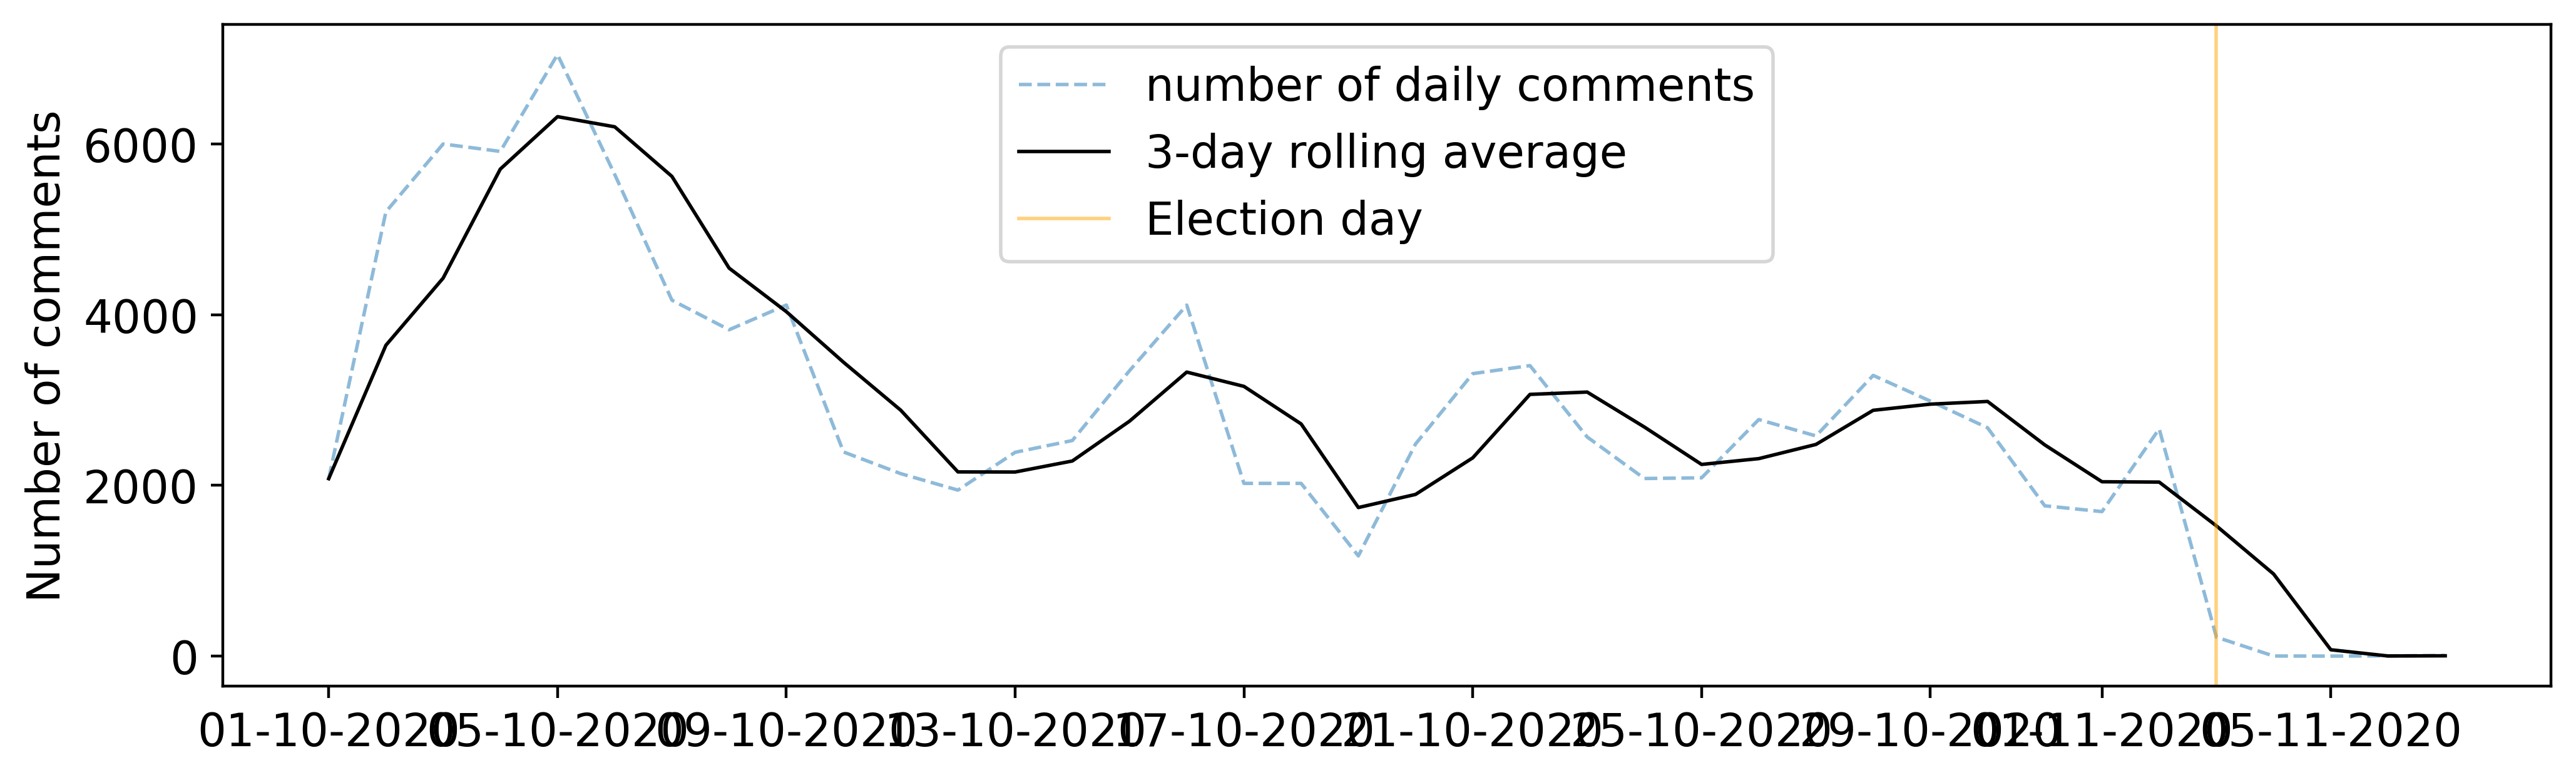

In [132]:
com_data = com_data[com_data.index >= "2020-10-01"]


daily_comments = com_data['id'].resample('D').count()

import matplotlib as mpl
import matplotlib.dates as mdates
#Specifying the MatPlotLib font and line width
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()
MyFmt = mdates.DateFormatter('%d-%m-%Y')
#Resample number of comments per day. 

#Convert to dataframe
daily_comments_df = pd.DataFrame(
                    {
                        'Daily comments' : daily_comments.values
                    }, index = daily_comments.index)

MA_comments = daily_comments_df["Daily comments"].rolling('3D').mean()
#Plot the moving average on top!

#fig, ax = plt.subplots(figsize=(15,5), dpi=400)
fig, ax = plt.subplots(figsize=(12,3.5), dpi=400)
ax.plot(daily_comments.index, daily_comments.values, ls = '--', alpha=0.5, label="number of daily comments")
ax.plot(MA_comments.index, MA_comments.values, color='k', label="3-day rolling average")

ax.axvline(x=daily_comments.index[33], label='Election day', color='orange', alpha=0.5)
#ax.plot(rolled_series.index, rolled_series.values, color='k', label="1 week rolling average")
ax.set_ylabel('Number of comments')
#ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFormat)



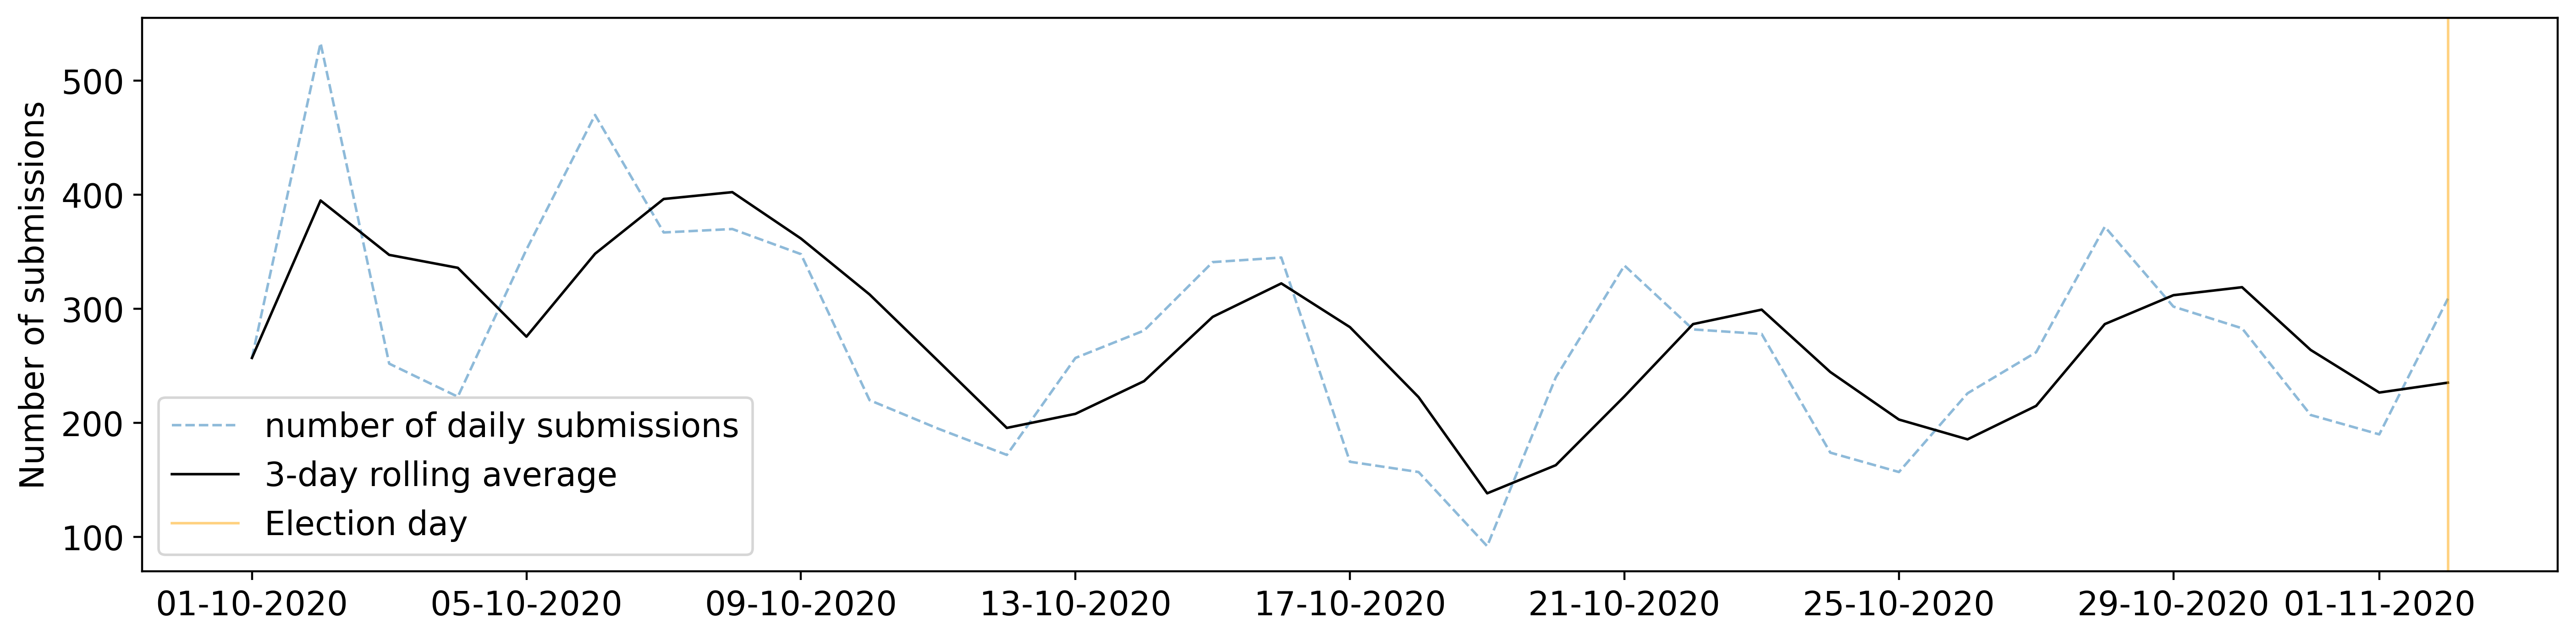

In [93]:
#We had some submissions befor the first of october
sub_data = sub_data[sub_data.index >= "2020-10-01"]

daily_subs = sub_data['id'].resample('D').count()

import matplotlib as mpl
import matplotlib.dates as mdates
#Specifying the MatPlotLib font and line width
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = '13'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()
MyFmt = mdates.DateFormatter('%d-%m-%Y')
#Resample number of comments per day. 

#Convert to dataframe
daily_subs_df = pd.DataFrame(
                    {
                        'Daily submissions' : daily_subs.values
                    }, index = daily_subs.index)

MA_subs = daily_subs_df["Daily submissions"].rolling('3D').mean()
#Plot the moving average on top!

#fig, ax = plt.subplots(figsize=(15,5), dpi=400)
fig, ax = plt.subplots(figsize=(17,4), dpi=400)
ax.plot(daily_subs.index, daily_subs.values, ls = '--', alpha=0.5, label="number of daily submissions")
ax.plot(MA_subs.index, MA_subs.values, color='k', label="3-day rolling average")

ax.axvline(x=daily_subs.index[32], label='Election day', color='orange', alpha=0.5)
#ax.plot(rolled_series.index, rolled_series.values, color='k', label="1 week rolling average")
ax.set_ylabel('Number of submissions')
#ax.set_yscale('log')
ax.legend()
ax.xaxis.set_major_formatter(myFormat)

plt.savefig('submissions_per_day.png', bbox_inches='tight')